# Breast Cancer Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('breast-cancer.csv')

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.shape

(569, 32)

In [5]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

Here M stands for Malignant
and B stands for Benign which are the two types of cancers
* Here since the dataset is a categorical variable we use classification techniques to predict the type of cancer in individuals
* Here the dataset is also balanced one


In [8]:
df['diagnosis']=pd.get_dummies(df['diagnosis'], drop_first=True)

In [9]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

after one hot encoding of the dependent feature diagnosis 0 represents B(Benign) and 1 represents M(Malignant)

In [10]:
## dropping the unwanted features
df = df.drop(['id'], axis=1) 

In [11]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

* There are no null values in the dataset

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    uint8  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Now all the features in the dataset are numerical only.


In [13]:
##checking for the duplicate rows
df.duplicated().sum()

0

In [14]:
##checking for the duplicate columns
df.columns.has_duplicates

False

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagnosis,569.0,0.372583,0.483918,0.000000,0.000000,0.000000,1.000000,1.00000
radius_mean,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
texture_mean,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
perimeter_mean,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
smoothness_mean,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
symmetry_mean,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400


#### Data Visualization

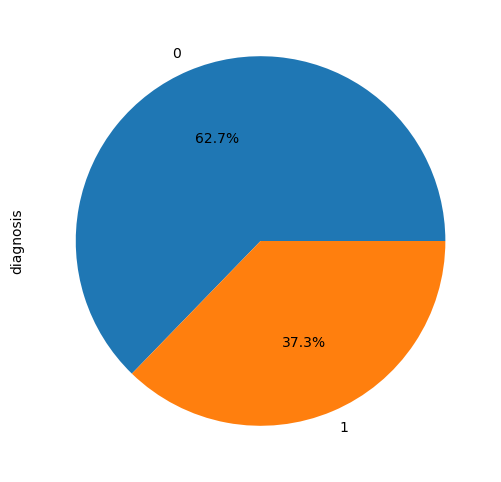

In [16]:
df['diagnosis'].value_counts().plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%')
plt.show()

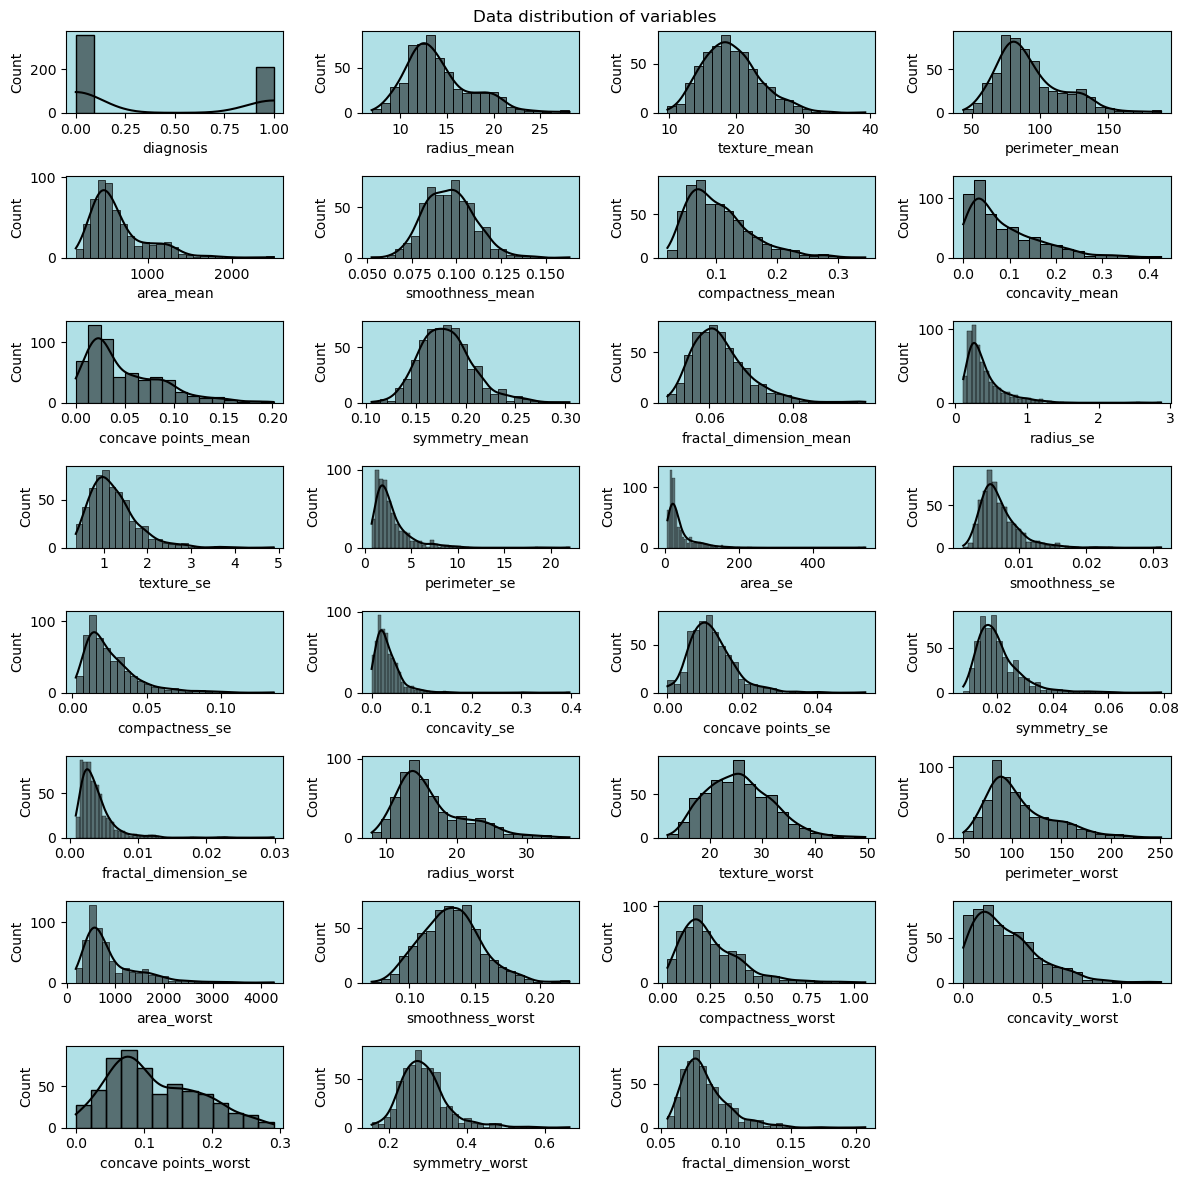

In [17]:
### checking the data distribution of every feature
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float','int64','uint8']).columns):
    plt.rcParams['axes.facecolor'] = 'powderblue'
    ax = plt.subplot(8,4, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='black',kde=True)
plt.suptitle('Data distribution of variables')
plt.tight_layout()

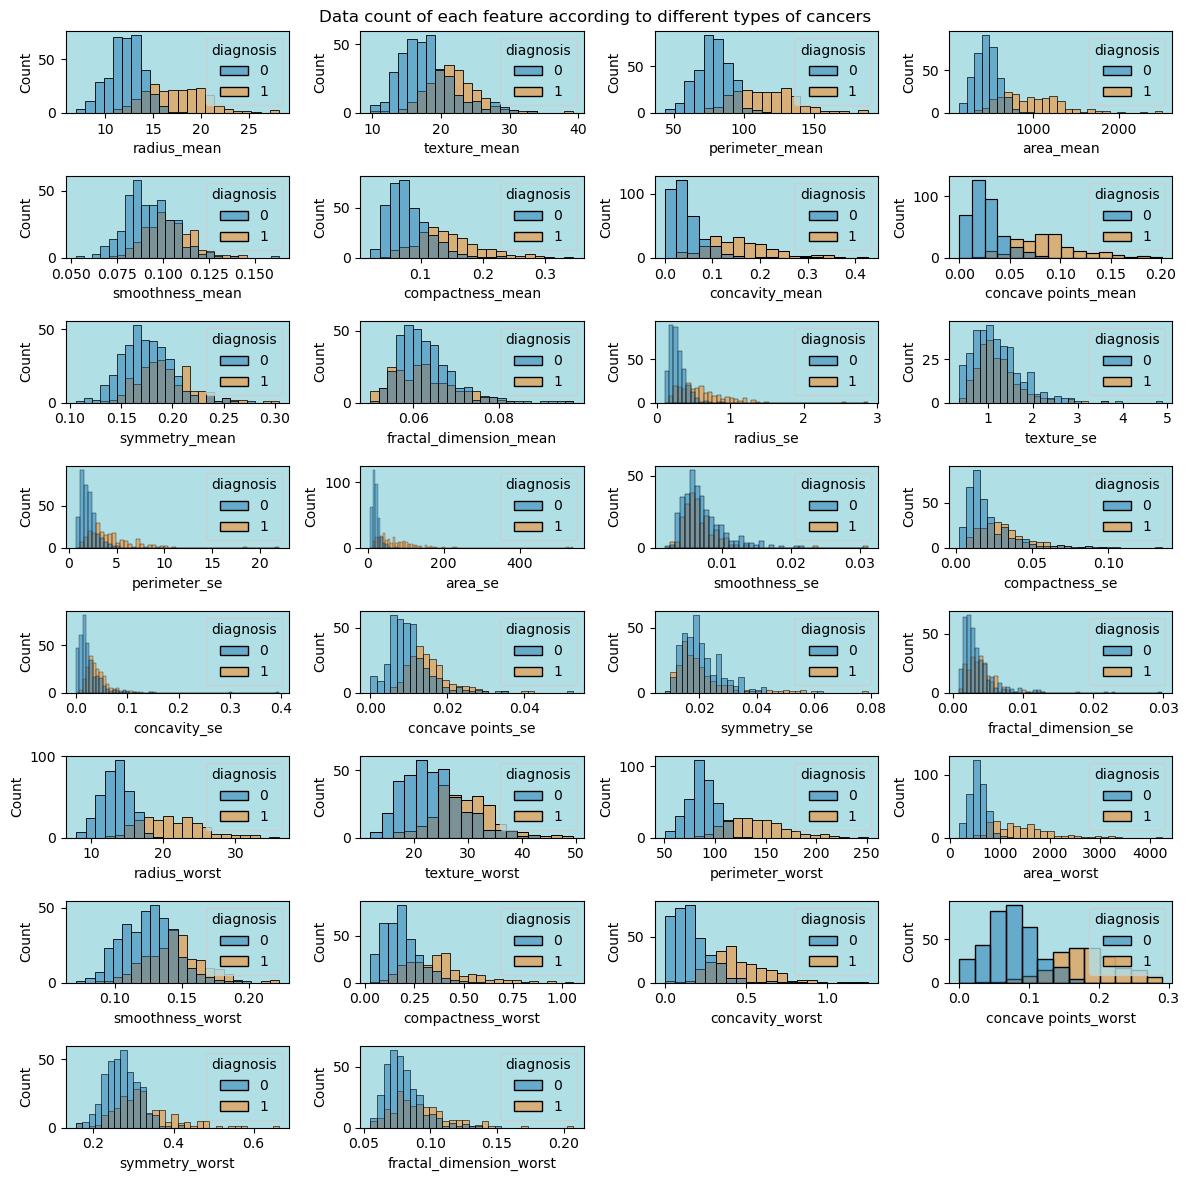

In [18]:
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'powderblue'
    ax = plt.subplot(8,4, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='black',hue=df['diagnosis'])
plt.suptitle('Data count of each feature according to different types of cancers')
plt.tight_layout()

### Principal component analysis
PCA will helps us in dimensionality reduction and also noise reduction

In [19]:
X=df.drop(['diagnosis'],axis=1)
y=df['diagnosis']

#Splitting train test by startified
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=24)

In [20]:
#Normalising the data, as for dimentionality reduction we need normalised data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

In [21]:
from sklearn.decomposition import PCA

In [22]:
explained_variation=[]
for n in range(1,30):
    pca=PCA(n_components=n)
    pca.fit(X_train_normalized)
    explained_variation.append(np.sum(pca.explained_variance_ratio_))

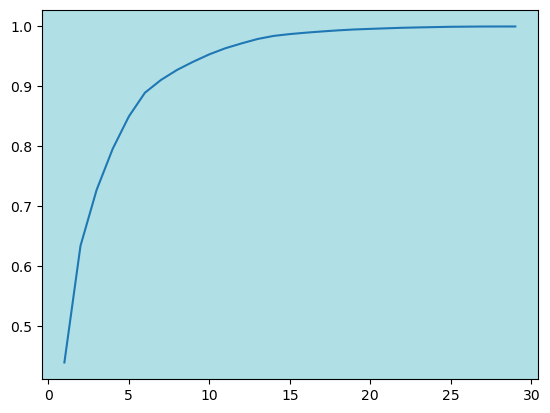

In [23]:
plt.plot(range(1,30),explained_variation)

In [24]:
#PCA
pca = PCA(n_components=15)
X_train_pca = pca.fit_transform(X_train_normalized)
X_test_pca = pca.transform(X_test_normalized)

In [25]:
pca.explained_variance_ratio_

array([0.43975941, 0.19453606, 0.0931118 , 0.06862064, 0.05379073,
       0.03971172, 0.02136451, 0.01671642, 0.01362715, 0.01231726,
       0.01018686, 0.00803429, 0.0073664 , 0.00515003, 0.00304397])

In [26]:
sum(pca.explained_variance_ratio_)

0.9873372514016627

### We reduced the features to 15 using Permanent Component Analysis
Now we will fit the different classification models to the data to classify it as which type of cancer

## model 1: K nearest neighbour classification

In [31]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.023391812865497075 at K = 7


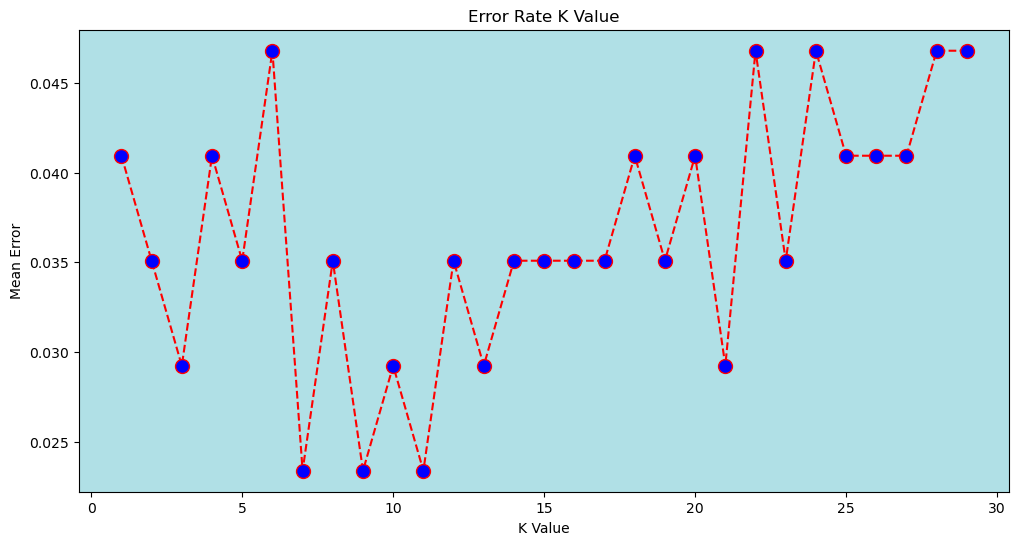

In [32]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_pca, y_train)
 pred_i = knn.predict(X_test_pca)
 error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
 markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

### For k=7

In [33]:
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(X_train_pca, y_train)

KNeighborsClassifier(n_neighbors=7)

In [34]:
## predictions on the test data
predictions=KNN.predict(X_test_pca)

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       107
           1       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [36]:
KNN_confusion_matrix=confusion_matrix(y_test, predictions)
print(KNN_confusion_matrix)

[[106   1]
 [  3  61]]


In [37]:
score_KNN = KNN.score(X_test_pca, y_test)
print('KNN Regression Score = ',score_KNN) 

KNN Regression Score =  0.9766081871345029


## model 2: Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
##calling the Logistic Regression as a logmodel variable
logmodel=LogisticRegression()
logmodel.fit(X_train_pca, y_train)

LogisticRegression()

In [39]:
## predictions on the test data
predictions=logmodel.predict(X_test_pca)

In [40]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))
logmodel_confusion_matrix=confusion_matrix(y_test, predictions)
print(logmodel_confusion_matrix)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[106   1]
 [  4  60]]


In [41]:
score_logmodel = logmodel.score(X_test_pca, y_test)
print('Logistic Regression Score = ',score_logmodel) 

Logistic Regression Score =  0.9707602339181286


### cross validation of logistic regression

In [42]:
acc = [] # list to store all performance metric

In [43]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, roc_curve, auc
from sklearn.model_selection import cross_val_score

best_score=0
kfolds=5 # set the number of folds

for c in [0.001, 0.1, 1, 10, 100]:
    logmodel = LogisticRegression(C=c)
    # perform cross-validation
    scores = cross_val_score(logmodel, X_train_pca, y_train, cv=kfolds, scoring='accuracy') # Get recall for each parameter setting
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # Find the best parameters and score
    if score > best_score:
        best_score = score
        best_parameters = c

# rebuild a model on the combined training and validation set
Selectedlogmodel = LogisticRegression(C=best_parameters).fit(X_train_pca, y_train)

test_score = Selectedlogmodel.score(X_test_pca, y_test)
PredictedOutput = Selectedlogmodel.predict(X_test_pca)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for regularization (C) is: ", best_parameters)
print("Test accuracy with best C parameter is", test_score)
print("Test recall with the best C parameter is", test_recall)
print("Test AUC with the best C parameter is", test_auc)
m = 'Logistic Regression (w/ imputation)'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.9723101265822784
Best parameter for regularization (C) is:  1
Test accuracy with best C parameter is 0.9707602339181286
Test recall with the best C parameter is 0.9375
Test AUC with the best C parameter is 0.9640771028037383


## model 3: gaussian Naive Bayes Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train_pca, y_train)

GaussianNB()

In [45]:
predictions = GNB.predict(X_test_pca)

In [46]:
print(classification_report(y_test,predictions))
GNB_confusion_matrix=confusion_matrix(y_test, predictions)
print(GNB_confusion_matrix)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
           1       0.88      0.88      0.88        64

    accuracy                           0.91       171
   macro avg       0.90      0.90      0.90       171
weighted avg       0.91      0.91      0.91       171

[[99  8]
 [ 8 56]]


In [47]:
score_GNB = GNB.score(X_test_pca, y_test)
print('Gaussian Naive Bayes Score = ',score_GNB) 

Gaussian Naive Bayes Score =  0.9064327485380117


## model 4: Decision Tree Classifier

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)

DecisionTreeClassifier()

In [49]:
## predictions on the test data
predictions=dtree.predict(X_test_pca)

[Text(0.5604838709677419, 0.9285714285714286, 'x[0] <= 0.364\ngini = 0.467\nsamples = 398\nvalue = [250, 148]'),
 Text(0.29838709677419356, 0.7857142857142857, 'x[0] <= -1.053\ngini = 0.124\nsamples = 255\nvalue = [238, 17]'),
 Text(0.14516129032258066, 0.6428571428571429, 'x[7] <= -1.713\ngini = 0.029\nsamples = 205\nvalue = [202, 3]'),
 Text(0.06451612903225806, 0.5, 'x[8] <= 1.791\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.03225806451612903, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.0967741935483871, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.22580645161290322, 0.5, 'x[1] <= -3.07\ngini = 0.02\nsamples = 203\nvalue = [201, 2]'),
 Text(0.16129032258064516, 0.35714285714285715, 'x[6] <= 0.124\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.12903225806451613, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.1935483870967742, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')

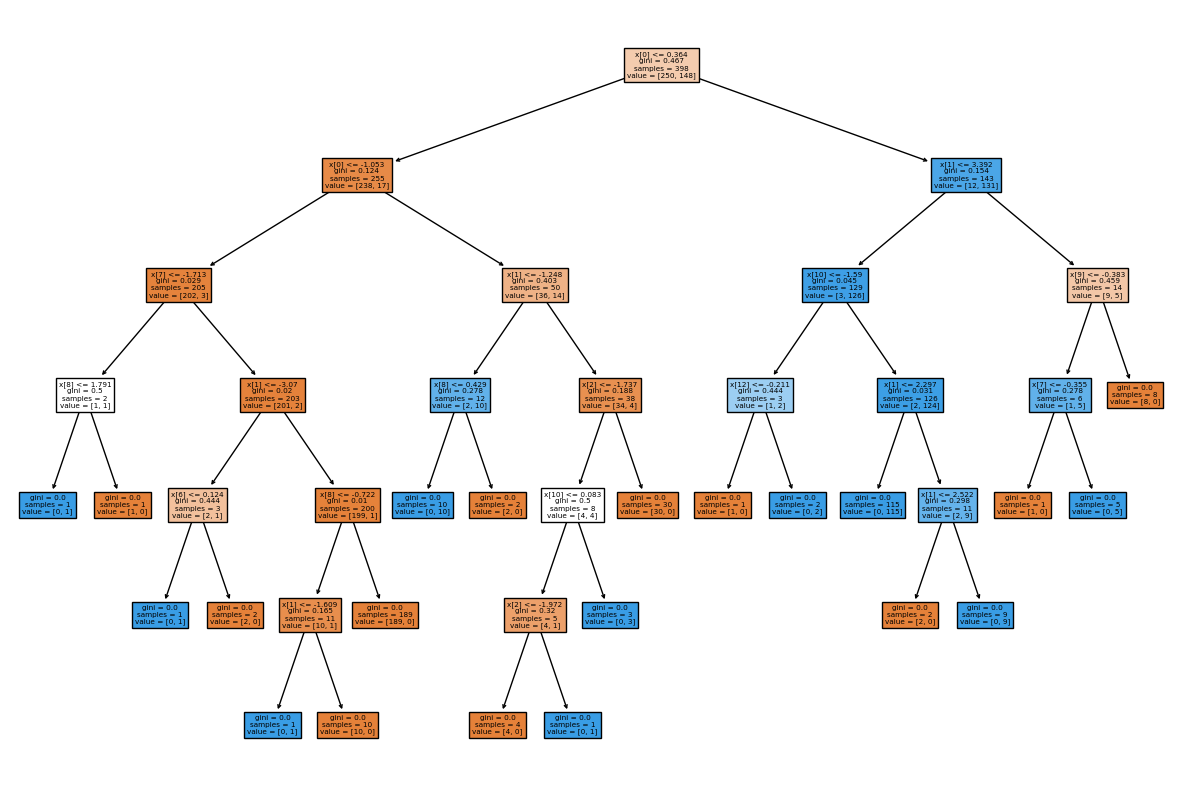

In [50]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dtree,filled=True, max_depth=None,label='all',impurity=True)

In [51]:
print(classification_report(y_test,predictions))
dtree_confusion_matrix=confusion_matrix(y_test, predictions)
print(dtree_confusion_matrix)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95       107
           1       0.95      0.86      0.90        64

    accuracy                           0.93       171
   macro avg       0.93      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171

[[104   3]
 [  9  55]]


In [52]:
score_dtree = dtree.score(X_test_pca, y_test)
print('Decision Tree Score = ',score_dtree) 

Decision Tree Score =  0.9298245614035088


### cross validation of decision Trees

Maximum depth. [1, 2, ..., 15]

15 is the number of features

In [53]:
best_score = 0

for md in range(1, 16): # iterate different maximum depth values
    # train the model
    dtree = DecisionTreeClassifier(random_state=0, max_depth=md, criterion='gini')
    # perform cross-validation
    scores = cross_val_score(dtree, X_train_pca, y_train, cv=kfolds, scoring='accuracy')
    
    # compute mean cross-validation accuracy
    score = np.mean(scores)
    
    # if we got a better score, store the score and parameters
    if score > best_score:
        best_score = score
        best_parameter = md

# Rebuild a model on the combined training and validation set        
Selecteddtree = DecisionTreeClassifier(max_depth=best_parameter).fit(X_train_pca, y_train )

test_score = Selecteddtree.score(X_test_pca, y_test)
PredictedOutput = Selecteddtree.predict(X_test_pca)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameter for the maximum depth is: ", best_parameter)
print("Test accuracy with best parameter is ", test_score)
print("Test recall with best parameters is ", test_recall)
print("Test AUC with the best parameter is ", test_auc)

m = 'Decision Tree'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.9322468354430381
Best parameter for the maximum depth is:  2
Test accuracy with best parameter is  0.8947368421052632
Test recall with best parameters is  0.78125
Test AUC with the best parameter is  0.8719334112149533


## model 5: Support Vector Classifier

In [54]:
from sklearn.svm import SVC
svm_classifier = SVC()
svm_classifier.fit(X_train_pca, y_train)

SVC()

In [55]:
predictions = svm_classifier.predict(X_test_pca)
print(classification_report(y_test,predictions))
svm_classifier_confusion_matrix=confusion_matrix(y_test, predictions)
print(svm_classifier_confusion_matrix)
score_svm_classifier = svm_classifier.score(X_test_pca, y_test)
print('SVM classifier Score = ',score_svm_classifier) 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.98      0.94      0.96        64

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

[[106   1]
 [  4  60]]
SVM classifier Score =  0.9707602339181286


### cross validation of Support Vector Classifier
C: Penalty parameter C of the error term. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

gamma: kernel coefficient. [0.001, 0.01, 0.1, 1, 10, 100, 1000]

kernel: kernel type. ['rbf', 'linear', 'poly', 'sigmoid']

In [56]:
best_score = 0

for c_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter C
    for gamma_paramter in [0.001, 0.01, 0.1, 1, 10, 100, 1000]: #iterate over the values we need to try for the parameter gamma
        for k_parameter in ['rbf', 'linear', 'poly', 'sigmoid']: # iterate over the values we need to try for the kernel parameter
            svm_classifier = SVC(kernel=k_parameter, C=c_paramter, gamma=gamma_paramter) #define the model
            # perform cross-validation
            scores = cross_val_score(svm_classifier, X_train_pca, y_train, cv=kfolds, scoring='accuracy')
            # the training set will be split internally into training and cross validation

            # compute mean cross-validation accuracy
            score = np.mean(scores)
            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score #store the score 
                best_parameter_c = c_paramter #store the parameter c
                best_parameter_gamma = gamma_paramter #store the parameter gamma
                best_parameter_k = k_parameter
            

# rebuild a model with best parameters to get score 
Selectedsvm_classifier = SVC(C=best_parameter_c, gamma=best_parameter_gamma, kernel=best_parameter_k).fit(X_train_pca, y_train)

test_score = Selectedsvm_classifier.score(X_test_pca, y_test)
PredictedOutput = Selectedsvm_classifier.predict(X_test_pca)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on cross validation set is:", best_score)
print("Best parameter for c is: ", best_parameter_c)
print("Best parameter for gamma is: ", best_parameter_gamma)
print("Best parameter for kernel is: ", best_parameter_k)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is", test_recall)
print("Test recall with the best parameter is", test_auc)

m = 'SVM'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on cross validation set is: 0.9749050632911394
Best parameter for c is:  0.1
Best parameter for gamma is:  0.001
Best parameter for kernel is:  linear
Test accuracy with the best parameters is 0.9766081871345029
Test recall with the best parameters is 0.953125
Test recall with the best parameter is 0.9718896028037384


## model 6: Random Forest classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train_pca, y_train)

RandomForestClassifier()

In [58]:
rfc_pred = rfc.predict(X_test_pca)

In [59]:
rfc_confusion_matrix=confusion_matrix(y_test, rfc_pred)
print(rfc_confusion_matrix)
print(classification_report(y_test,rfc_pred))
score_rfc = rfc.score(X_test_pca, y_test)
print('Random Forest Classifier score = ',score_rfc) 

[[101   6]
 [  3  61]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       107
           1       0.91      0.95      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171

Random Forest Classifier score =  0.9473684210526315


### cross validation of random forest classifier
n_estimators(M): the number of trees in the forest

max_features(d): the number of features to consider when looking for the best split

max_depth(m): the maximum depth of the tree. 

In [60]:
best_score = 0

for M in range(2, 15, 2): # combines M trees
    for d in range(1, 9): # maximum number of features considered at each split
        for m in range(1, 9): # maximum depth of the tree
            # train the model
            # n_jobs(4) is the number of parallel computing
            rfc = RandomForestClassifier(n_estimators=M, max_features=d, n_jobs=4,
                                          max_depth=m, random_state=0)
        
            # perform cross-validation
            scores = cross_val_score(rfc, X_train_pca, y_train, cv=kfolds, scoring='accuracy')

            # compute mean cross-validation accuracy
            score = np.mean(scores)

            # if we got a better score, store the score and parameters
            if score > best_score:
                best_score = score
                best_M = M
                best_d = d
                best_m = m

# Rebuild a model on the combined training and validation set        
Selectedrfc = RandomForestClassifier(n_estimators=M, max_features=d,
                                          max_depth=m, random_state=0).fit(X_train_pca, y_train )

PredictedOutput = Selectedrfc.predict(X_test_pca)
test_score = Selectedrfc.score(X_test_pca, y_test)
test_recall = recall_score(y_test, PredictedOutput, pos_label=1)
fpr, tpr, thresholds = roc_curve(y_test, PredictedOutput, pos_label=1)
test_auc = auc(fpr, tpr)
print("Best accuracy on validation set is:", best_score)
print("Best parameters of M, d, m are: ", best_M, best_d, best_m)
print("Test accuracy with the best parameters is", test_score)
print("Test recall with the best parameters is:", test_recall)
print("Test AUC with the best parameters is:", test_auc)

m = 'Random Forest'
acc.append([m, test_score, test_recall, test_auc, fpr, tpr, thresholds])

Best accuracy on validation set is: 0.9472468354430379
Best parameters of M, d, m are:  14 4 5
Test accuracy with the best parameters is 0.9298245614035088
Test recall with the best parameters is: 0.890625
Test AUC with the best parameters is: 0.9219480140186915


## Accuracies of different models

* KNN Regression Score =  0.9766081871345029
* Logistic Regression Score =  0.9707602339181286
* Best accuracy on validation set of logistic regression : 0.9723101265822784
* Gaussian Naive Bayes Score =  0.9064327485380117
* Decision Tree Score =  0.9239766081871345
* Best accuracy on validation set of Decision Tree: 0.9322468354430381
* SVM classifier Score =  0.9707602339181286
* Best accuracy on cross validation set of SVM classifier: 0.9749050632911394
* Random Forest Classifier score =  0.9415204678362573
* Best accuracy on validation set of Random Forest Classification: 0.9472468354430379


## Among all the models logistic regression, k nearest neighbours classification, support vector classifiers are giving best accuracy in prediction of brest cancer in individuals